# Getting Started with Qiskit

Here, we provide an overview of working with Qiskit.  The fundamental package of Qiskit is Terra that provides the basic building blocks necessary to program quantum computers. The fundamental unit of Qiskit is the [quantum circuit](https://en.wikipedia.org/wiki/Quantum_circuit). A basic workflow using Qiskit consists of two stages: **Build** and **Execute**. **Build** allows you to make different quantum circuits that represent the problem you are solving, and **Execute** that allows you to run them on different backends.  After the jobs have been run, the data is collected and postprocessed depending on the desired output.

In [1]:
import numpy as np
from qiskit import *
from qiskit import IBMQ
IBMQ.save_account('fcce0a328746046e33457b64ccc20e8aa38d6354f31b964a3cce796f4f063965d45e3b06306e4eb9f2e045e5aa2d5426033a15be5953b76f2ed88cdc7134c5c7',overwrite=True)
%matplotlib inline

In [2]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

In [3]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

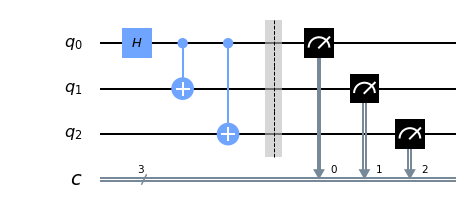

In [17]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ + meas

#drawing the circuit
qc.draw('mpl')

In [16]:
# Use Aer's qasm_simulator
#backend_sim = Aer.get_backend('qasm_simulator')


# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
#job_sim = execute(qc, backend_sim, shots=1024)
#provider = IBMQ.get_provider(hub='ibm-q')
from qiskit.providers.ibmq import least_busy
provider = IBMQ.load_account()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (3) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

#backend = provider.backends.ibmq_vigo
#qobj = assemble(transpile(qc, backend=backend), backend=backend)
#job = backend.run(qobj)
# Grab the results from the job.

ibmqfactory.load_account:WARNING:2020-09-10 18:40:56,027: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_ourense


In [19]:
###status =backend.status()
#is_operational = status.operational
#jobs_in_queue = status.pending_jobs
##print(is_operational)
##print(jobs_in_queue)
#print(status)
#backend.status()

from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(qc, backend=backend, shots=shots, optimization_level=3)

job_monitor(job, interval = 2)

Job Status: job has successfully run


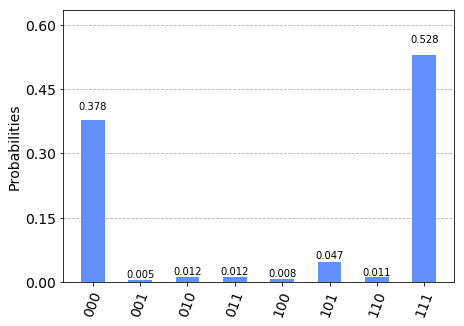

In [22]:
from qiskit.visualization import plot_histogram
results = job.result()
answer = results.get_counts()

plot_histogram(answer)